In [71]:
%load_ext autoreload
%autoreload 2

import subprocess
from google.cloud import storage
import os
import PIL
import terra
import pandas as pd
import numpy as np
import meerkat as mk
import torchxrayvision as xrv
from domino.data.mimic import build_dp, mimic_transform
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from domino.evaluate.linear import induce_correlation, check_corr_induction
from domino.evaluate.train import train_linear_slices, score_linear_slices


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dp = build_dp(
    dataset_dir="/home/common/datasets/mimic", 
    gcp_project="hai-gcp-fine-grained"
)

task: build_dp, run_id=1267


In [35]:
dp = build_dp.out(1267, load=True)

In [42]:
df = score_linear_slices.out(1481).load()

In [64]:
score_linear_slices.inp(1481)["model_df"].run_dir

'/home/sabri/terra/slice/tasks/evaluate/train/train_linear_slices/_runs/1302'

In [67]:
plot_df = terra.out(1588).load()
plot_df

,auroc,test correlation,target,correlate,train correlation,"Y,S"
0,0.564706,train_corr,Lung_Lesion_uzeros,gender_male,0.1,"Lung_Lesion_uzeros,gender_male"
1,0.478893,uncorrelated,Lung_Lesion_uzeros,gender_male,0.1,"Lung_Lesion_uzeros,gender_male"
2,0.543945,train_corr,Lung_Lesion_uzeros,gender_male,0.0,"Lung_Lesion_uzeros,gender_male"
3,0.619377,uncorrelated,Lung_Lesion_uzeros,gender_male,0.0,"Lung_Lesion_uzeros,gender_male"
4,0.611765,train_corr,Lung_Lesion_uzeros,gender_male,0.3,"Lung_Lesion_uzeros,gender_male"
...,...,...,...,...,...,...
201,0.542808,uncorrelated,Support_Devices_uzeros,young,0.6,"Support_Devices_uzeros,young"
202,0.954909,train_corr,Support_Devices_uzeros,young,0.7,"Support_Devices_uzeros,young"
203,0.837900,uncorrelated,Support_Devices_uzeros,young,0.7,"Support_Devices_uzeros,young"
204,0.891553,train_corr,Support_Devices_uzeros,young,0.8,"Support_Devices_uzeros,young"


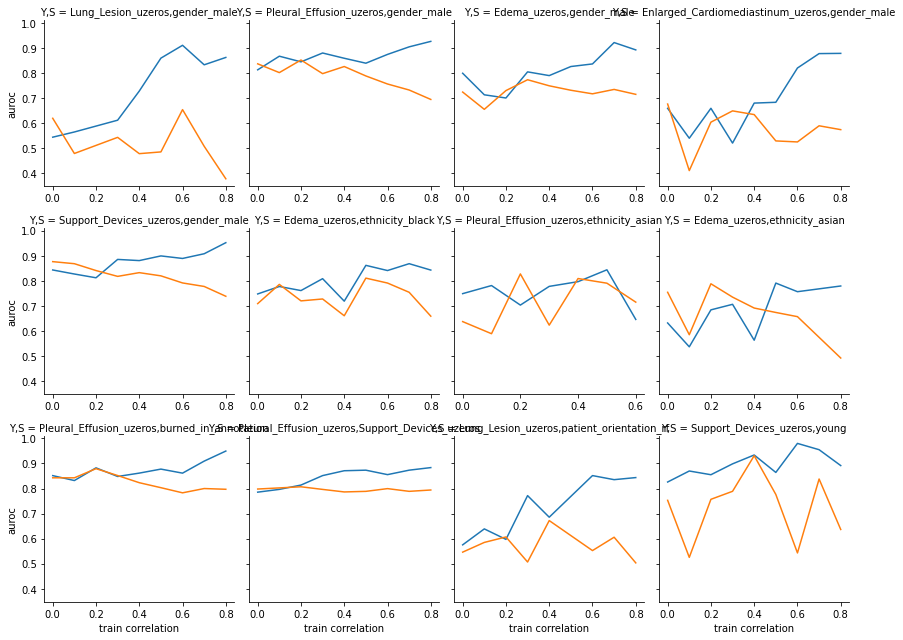

In [72]:
plot_df = terra.out(1588).load()

g = sns.FacetGrid(plot_df, col="Y,S",  col_wrap=4, hue="test correlation", sharex=False)
g.map(sns.lineplot, "train correlation", "auroc")
plt.savefig("out.pdf")

In [78]:
df = score_linear_slices.out(1481).load()

In [4]:
check_corr_induction(
    dp=build_dp.out(1267),
    attributes=[
        "patient_orientation_rf",
        "young",
        "ethnicity_black",
        "ethnicity_hisp",
        "ethnicity_asian",
        "burned_in_annotation",
        "gender_male",
        "Edema_uzeros",
        "Pleural_Effusion_uzeros",
        "Support_Devices_uzeros",
        "Enlarged_Cardiomediastinum_uzeros",
        "Lung_Lesion_uzeros"
    ],
    corr_start=0,
    corr_end=0.8,
    n=30000
)

task: check_corr_induction, run_id=1270


  0%|          | 0/12 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/home/sabri/code/terra/terra/__init__.py", line 230, in _run
    out = self.fn(**args_dict)
  File "/home/sabri/code/domino/domino/evaluate/linear.py", line 152, in check_corr_induction
    induce_correlation(
  File "/home/sabri/code/domino/domino/evaluate/linear.py", line 74, in induce_correlation
    elif int(n_b1) > df[attr_b].sum():
ValueError: cannot convert float NaN to integer



ValueError: cannot convert float NaN to integer

In [79]:
out = induce_correlation(
    df=dp,
    corr=0,
    attr_a="Pleural_Effusion_uzeros",
    attr_b="young",
    n=30000,
    match_mu=True
)

array(["['A', 'F']", "['F', 'A']", "['F', 'L']", "['F', 'R']",
       "['H', 'L']", "['L', 'F']", "['LP', 'F']", "['R', 'F']"],
      dtype=object)

In [46]:
dp["patient_orientation_rf"]  = dp["PatientOrientation"].data == "['R', 'F']"

In [72]:
dp["young"] = (dp["anchor_age"] < 40)

In [97]:
pd.Series(dp["BurnedInAnnotation"].data).unique()

array(['YES', 'NO'], dtype=object)

In [101]:
dp["BurnedInAnnotation"].mean()

0.0

In [100]:
dp.columns

['dicom_id',
 'subject_id_x',
 'study_id',
 'path',
 'subject_id_1',
 'study_id_1',
 'path_1',
 'subject_id_2',
 'study_id_2',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged_Cardiomediastinum',
 'Fracture',
 'Lung_Lesion',
 'Lung_Opacity',
 'No_Finding',
 'Pleural_Effusion',
 'Pleural_Other',
 'Pneumonia',
 'Pneumothorax',
 'Support_Devices',
 'subject_id_3',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'dod',
 'dicom',
 'StudyDate_x',
 'ImageType',
 'TableType',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'Exposure',
 'ExposureTime',
 'XRayTubeCurrent',
 'FieldOfViewRotation',
 'FieldOfViewOrigin',
 'FieldOfViewHorizontalFlip',
 'ViewPosition',
 'PatientOrientation',
 'BurnedInAnnotation',
 'RequestingService',
 'DetectorPrimaryAngle',
 'DetectorElementPhysicalSize',
 'subject_id_y',
 'StudyDate_y',
 'hadm_id',
 'admittime',
 'dischtime',
 'deathtime',
 'admission_type',
 'admission_location',
 'discharge_location',
 'insuranc